In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Class:
class Agent:
    """Class that defines the agent with the following methods:
    - X
    - Y
    - setPosition
    - getPosition"""
    def __init__(self, name, color, x, y):
        self.name = name
        self.color = color
        self.X = x
        self.Y = y
    
    def X(self, x):
        return self.x
    
    def Y(self, y):
        return self.y

    def setPosition(self, x, y):
        self.X = x
        self.Y = y
        return
    
    def getPosition(self):
        return self.X, self.Y
    
# Functions: 
# 1. Patcher:
def patcher(x0,y0,x1,y1):
    """This function takes 4 coordinates and returns a rounded
    rectangle patch to draw in an axis."""
    assert(x1>x0), 'Final x1 point has to be bigger than initial x0'
    assert(y1>y0), 'Final y1 point has to be bigger than initial y0'
    face, edge = (.95,.95,.95), (.6,.6,.6)
    w, h = x1-x0-0.4, y1-y0-0.4
    return mpatches.FancyBboxPatch([x0+.2,y0+.2],w,h,boxstyle="round,pad=0.05", mutation_scale=2., fc=face, ec=edge)

# 2. Scenario plotter:
def scenario(xmax, ymax, patchlist, grid=None):
    """This function obtains the (xmax, ymax) limits of the plot, 
    a list of patches to draw and optionally the grid parameter
    (boolean) to draw the scenario in which the agents will be 
    drawn."""
    assert type(patchlist)==list, 'The patches must be a list'
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(7,7))
    ax.axis([-0.1,xmax+.1,-0.1,ymax+.1])
    if grid:
        ax.grid(True)
    
    ax.tick_params(axis='both', left=False, bottom=False,
                    labelbottom=False, labelleft=False)
    [ax.add_patch(a) for a in f]
    
    return fig, ax

# 3. Find paths:
def possiblePaths(current, previous, min_grid=0, max_grid=5):
    """This function gets the current position and the previous to
    return a list of possible future states for the agent. It considers
    the edges and avoids them."""
    x, y = current[0], current[1]
    #Ensuring border continuity
    minx, miny, maxx, maxy = x-1, y-1, x+1, y+1
    if minx<min_grid: minx=maxx
    if miny<min_grid: miny=maxy
    if maxx>max_grid: maxx=minx
    if maxy>max_grid: maxy=miny
        
    # Main loop:
    move = [(x,a) for a in range(miny,maxy+1,2)]+\
            [(a,y) for a in range(minx,maxx+1,2)]
    if previous in move:
        move.remove(previous)
    return move

# 4. Move:
def moveTowards(list_of_movements):
    """Returns the new position of an agent"""
    return list_of_movements[np.random.choice(range(len(list_of_movements)))]

# 5. Check if they met each other:
def meeting(history_1, history_2):
    """Returns whether or not two agents have found each other."""
    if (history_1[-1]==history_2[0]) & (history_1[0]==history_2[-1]):
        return True
    elif history_1[-1]==history_2[-1]:
        return True
    else:
        return False
    
# 6. Randomize start points with a certain Manhattan distance:
def initialize(positiontuple=None, manhattandistance=2, xmax=5, ymax=5):
    """Initialize the positions maintaining a certain Manhattan distance
    and keeping the agents within the specified limits (xmax, ymax)"""
    assert manhattandistance>0, 'Manhattan distance must be greater than 0'
    assert manhattandistance<=(xmax+ymax), 'Manhattan distance cannot be larger than xmax+ymax'
    # First agent:
    if positiontuple:
        position1 = positiontuple
    else:
        if manhattandistance>6:
            position1 = tuple(np.random.randint(3, size=2))
        else:
            position1 = tuple(np.random.randint(xmax+1, size=2))
    # Second agent:    
    while True:
        dx = np.random.randint(manhattandistance+1)
        dy = manhattandistance-dx
        x = position1[0]+dx*[(-1)**np.random.randint(2), 1][manhattandistance>6]
        y = position1[1]+dy*[(-1)**np.random.randint(2), 1][manhattandistance>6]
        #print(position1, (x,y))
        if (x<=xmax) & (x>=0) & (y<=ymax) & (y>=0):
            position2 = (x, y)
            if position1 != position2:
                break
        if manhattandistance>6:
            position1 = tuple(np.random.randint(3, size=2))

    
    return position1, position2

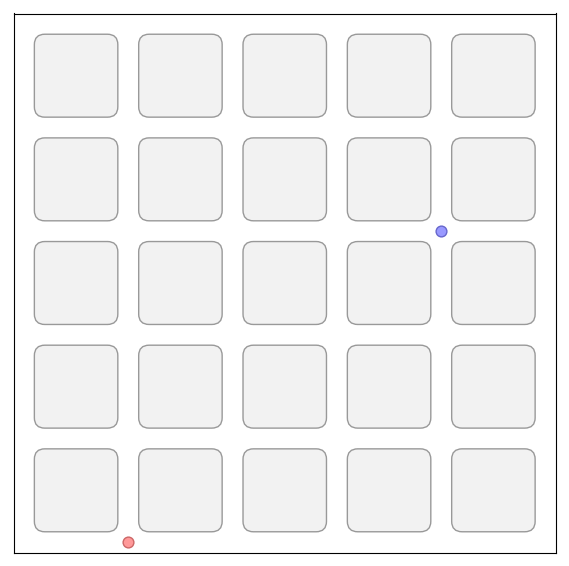

In [2]:
# Example scenario:
# 1. Parameters:
xmax, ymax = 5, 5
Apos, Bpos = initialize(manhattandistance=6, xmax=xmax, ymax=ymax)

# 2. Patches, as regular squares:
f = []
for x in range(xmax):
    for y in range(ymax):
        f.append(patcher(x,y,x+1,y+1))

# 3. Draw the scenario
fig, ax = scenario(xmax, ymax, f)
first = ax.scatter(Apos[0], Apos[1], s=300/xmax, facecolor = (.6,.6,1.), edgecolor=(.4,.4,.8))
second = ax.scatter(Bpos[0], Bpos[1], s=300/xmax, facecolor = (1,.6,.6), edgecolor=(.8,.4,.4))
plt.show()

In [3]:
N = 1000
total = np.zeros((N,xmax+ymax))
for md in range(1, xmax+ymax+1):
    Apos, Bpos = initialize(manhattandistance=md, xmax=xmax, ymax=ymax)
    for trial in range(N):
        A = Agent('A', 'blau', Apos[0], Apos[1])
        B = Agent('B', 'vermell', Bpos[0], Bpos[1])

        # Start the logging:
        path_1 = [A.getPosition()]
        path_2 = [B.getPosition()]
        history_1 = path_1.copy()
        history_2 = path_2.copy()

        # Both move:
        i = 0
        while True:
            path_1.append(moveTowards(possiblePaths(A.getPosition(),history_1[-1])))
            path_2.append(moveTowards(possiblePaths(B.getPosition(),history_2[-1])))
            history_1 = path_1[-2:].copy()
            history_2 = path_2[-2:].copy()
            A.setPosition(*path_1[-1])
            B.setPosition(*path_2[-1])
            i += 1
            found = meeting(history_1, history_2)
            if found:
                break
        #print('Found in {} steps!'.format(i))
        total[trial,md-1]=i
    print('Manhattan distance = {} stats:\tMean = {:5.2f} ± {:5.2f}'.format(md, np.mean(total), np.std(total)))

Manhattan distance = 1 stats:	Mean =  5.99 ± 28.65
Manhattan distance = 2 stats:	Mean =  8.05 ± 30.27
Manhattan distance = 3 stats:	Mean = 15.34 ± 42.90
Manhattan distance = 4 stats:	Mean = 18.54 ± 44.08
Manhattan distance = 5 stats:	Mean = 26.76 ± 54.05
Manhattan distance = 6 stats:	Mean = 30.38 ± 54.20
Manhattan distance = 7 stats:	Mean = 38.99 ± 60.96
Manhattan distance = 8 stats:	Mean = 42.88 ± 60.38
Manhattan distance = 9 stats:	Mean = 51.73 ± 64.57
Manhattan distance = 10 stats:	Mean = 55.97 ± 63.40


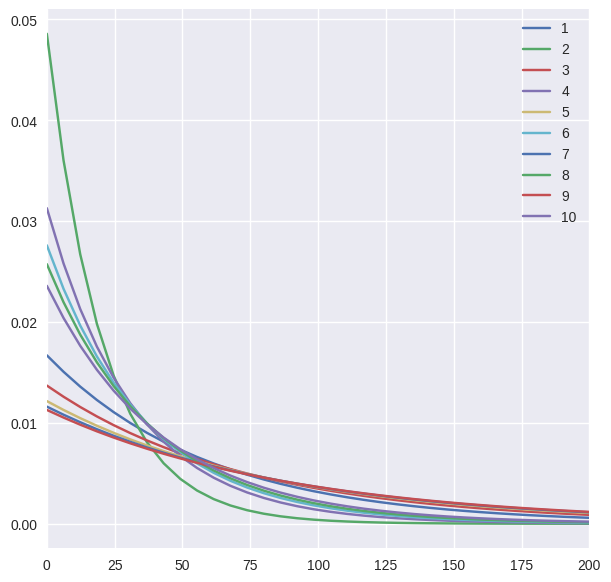

In [4]:
m = 1/np.mean(total, axis=0, keepdims=True).T
x = np.linspace(0, np.max(total),100)
e = m*np.exp(-m*x)

plt.figure(figsize=(7,7))
#plt.hist(total, bins=10, density=True)
plt.style.use('seaborn')
plt.plot(x, e.T)
plt.xlim([0,200])
plt.legend([i for i in range(1,11)])
plt.show()

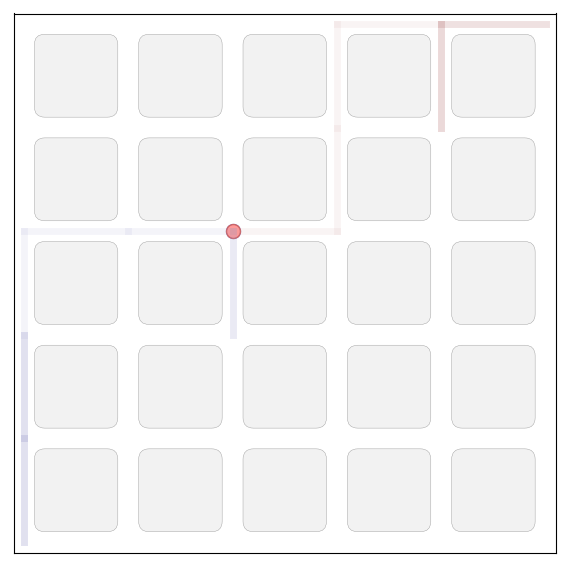

In [5]:
f = []
for x in range(5):
    for y in range(5):
        f.append(patcher(x,y,x+1,y+1))
_, ax = scenario(5, 5, f)
first = ax.scatter(history_1[1][0], history_1[1][1], s=100, facecolor = (.6,.6,1.), edgecolor=(.4,.4,.8))
second = ax.scatter(history_2[1][0], history_2[1][1], s=100, facecolor = (1,.6,.6), edgecolor=(.8,.4,.4))
for n in range(len(path_1)-1):
    coords_x = [a[0] for a in [path_1[n], path_1[n+1]]]
    coords_y = [a[1] for a in [path_1[n], path_1[n+1]]]
    ax.plot(coords_x, coords_y, alpha=.1, color=(.6,.6,.8), linewidth=5)
for n in range(len(path_2)-1):
    coords_x = [a[0] for a in [path_2[n], path_2[n+1]]]
    coords_y = [a[1] for a in [path_2[n], path_2[n+1]]]
    ax.plot(coords_x, coords_y, alpha=.1, color=(.8,.6,.6), linewidth=5)
plt.show()